In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 
from scipy import fftpack
%matplotlib inline
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})

### Import data
copy the data file from postProcessing/forces/0/coefficient.data to ./data folder

In [2]:
f_name = "/postProcessing/forces/0/coefficient.dat"
fo_name = "plot_data/cases/"
cases = ['case_100','case_200','case_400']
data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name+case+f_name, unpack=True, usecols=[0, 1, 3])

#### Loading only Cd and Cl

mean drag/lift for case_100: 3.0609/-0.0935
mean drag/lift for case_200: 3.1715/-0.0126
mean drag/lift for case_400: 3.1746/-0.0163
Frequency peak at f=5.75
Frequency peak at f=6.00
Frequency peak at f=6.00


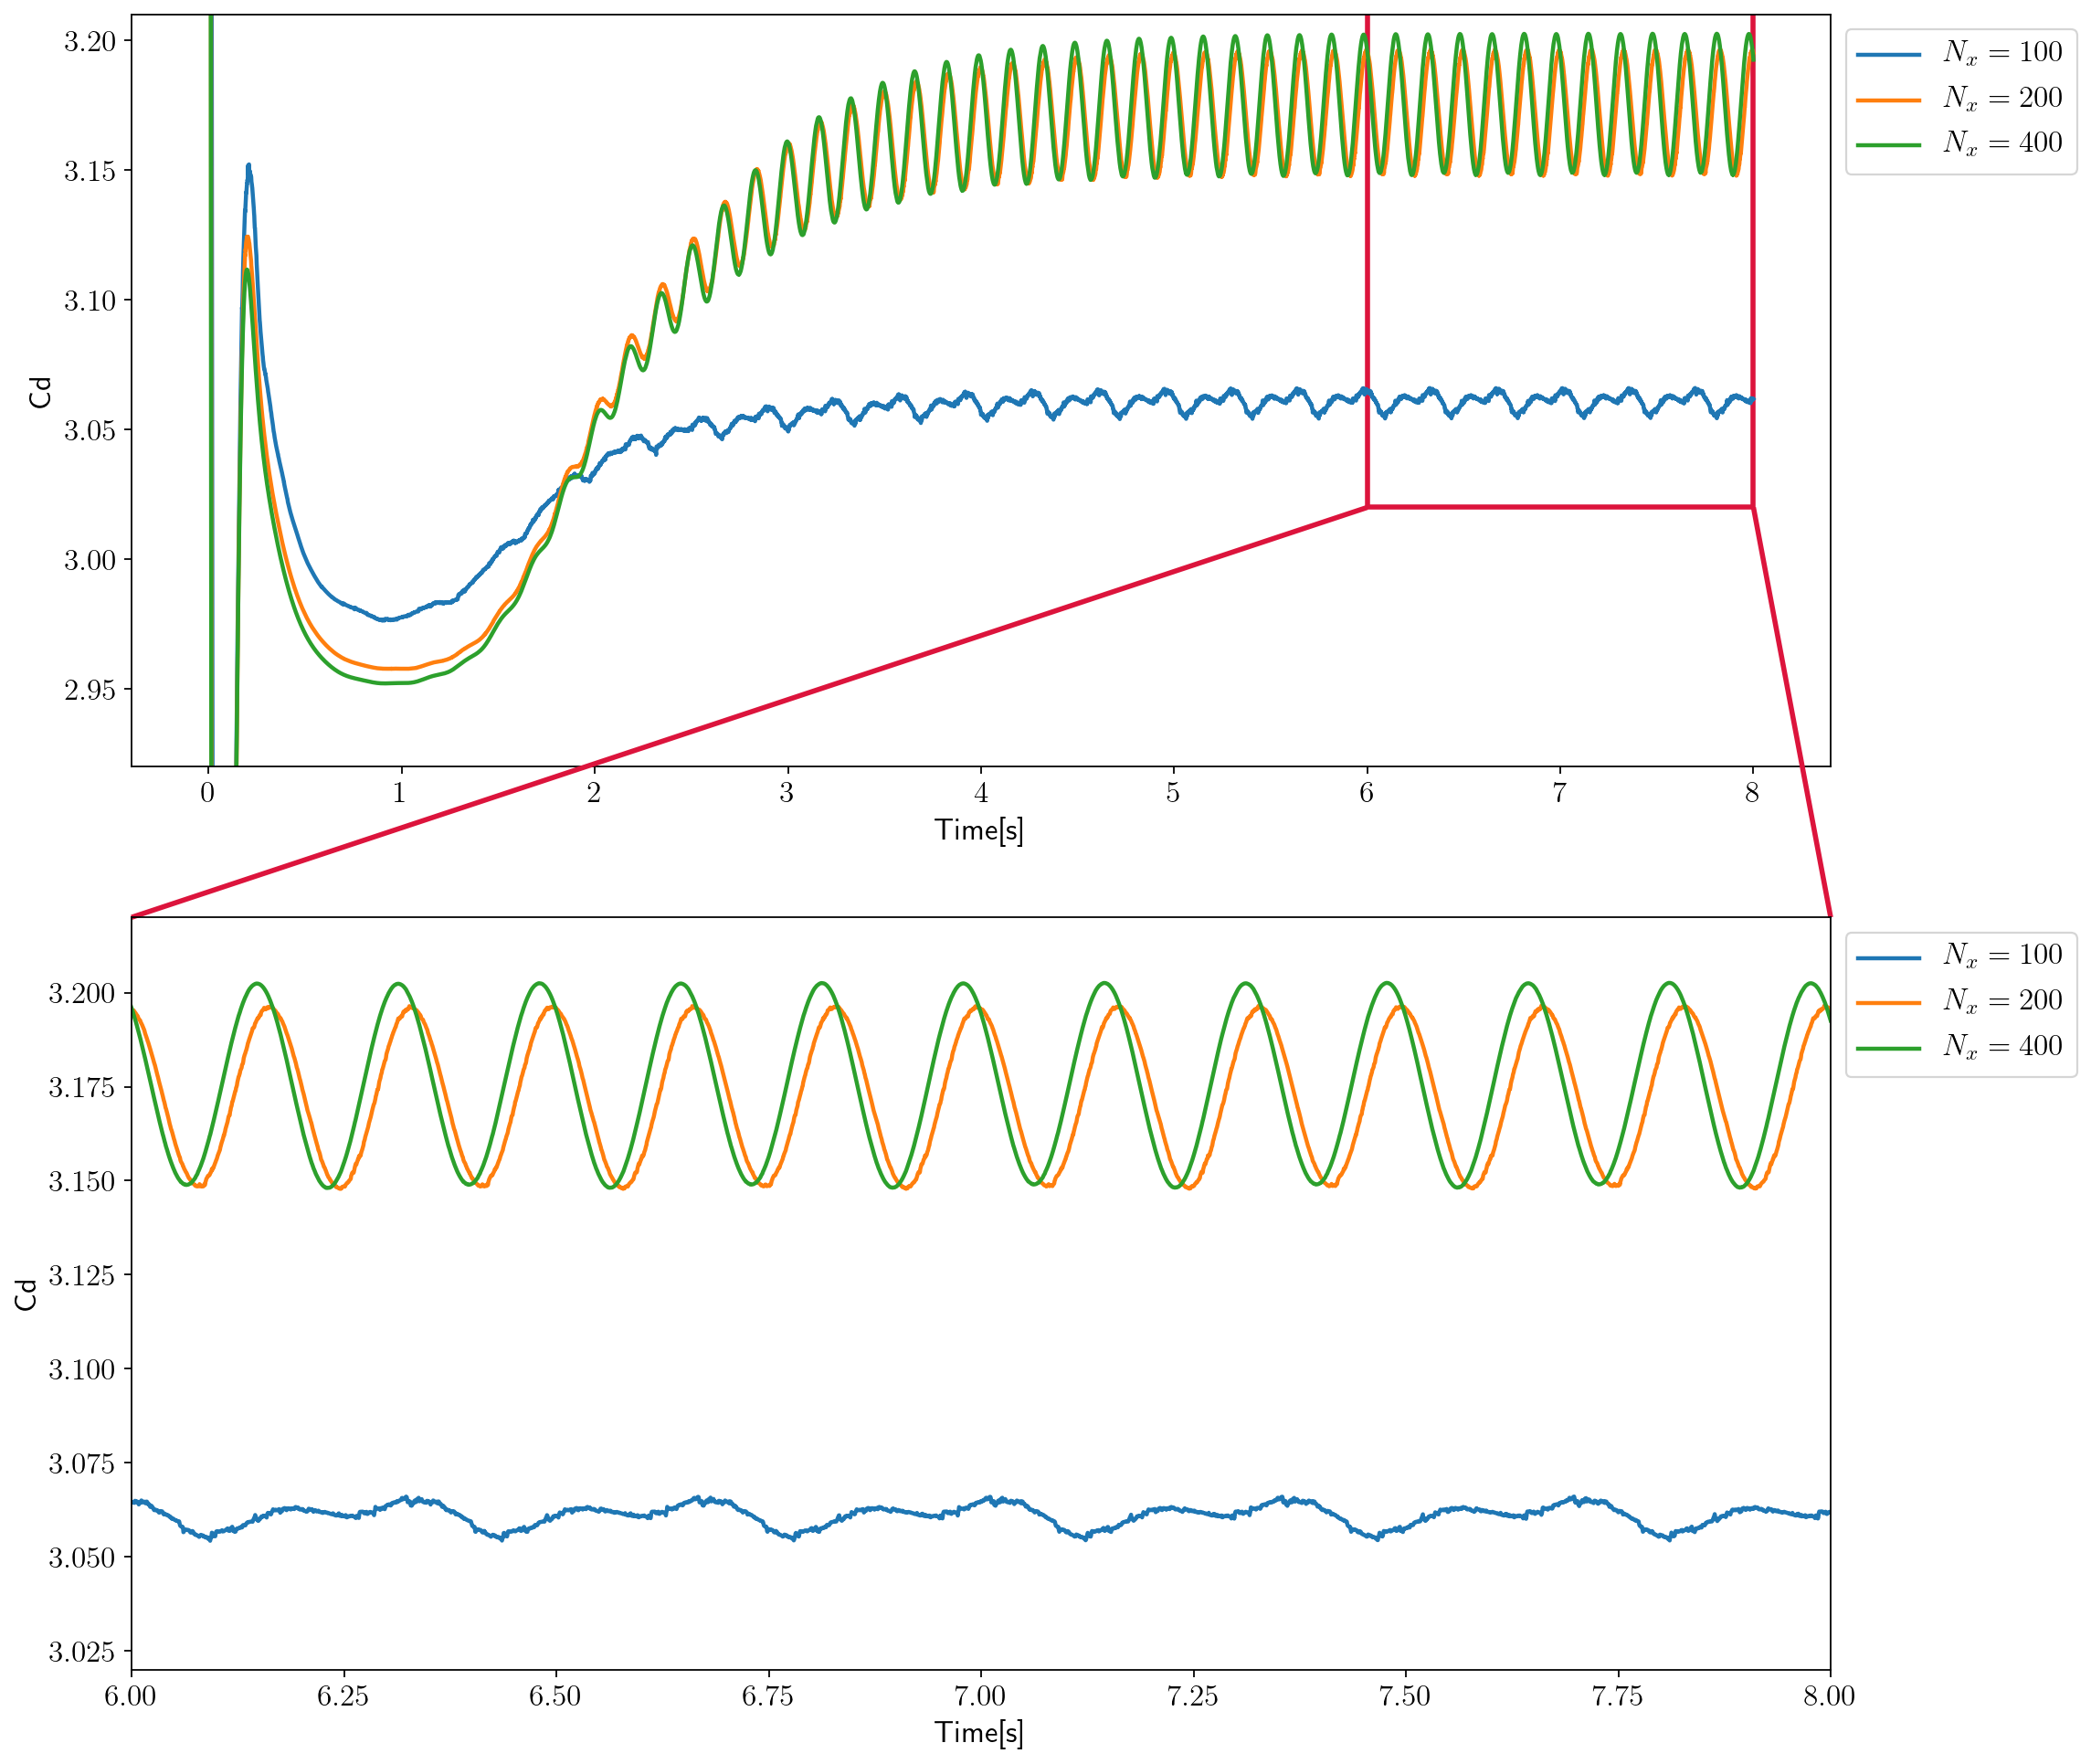

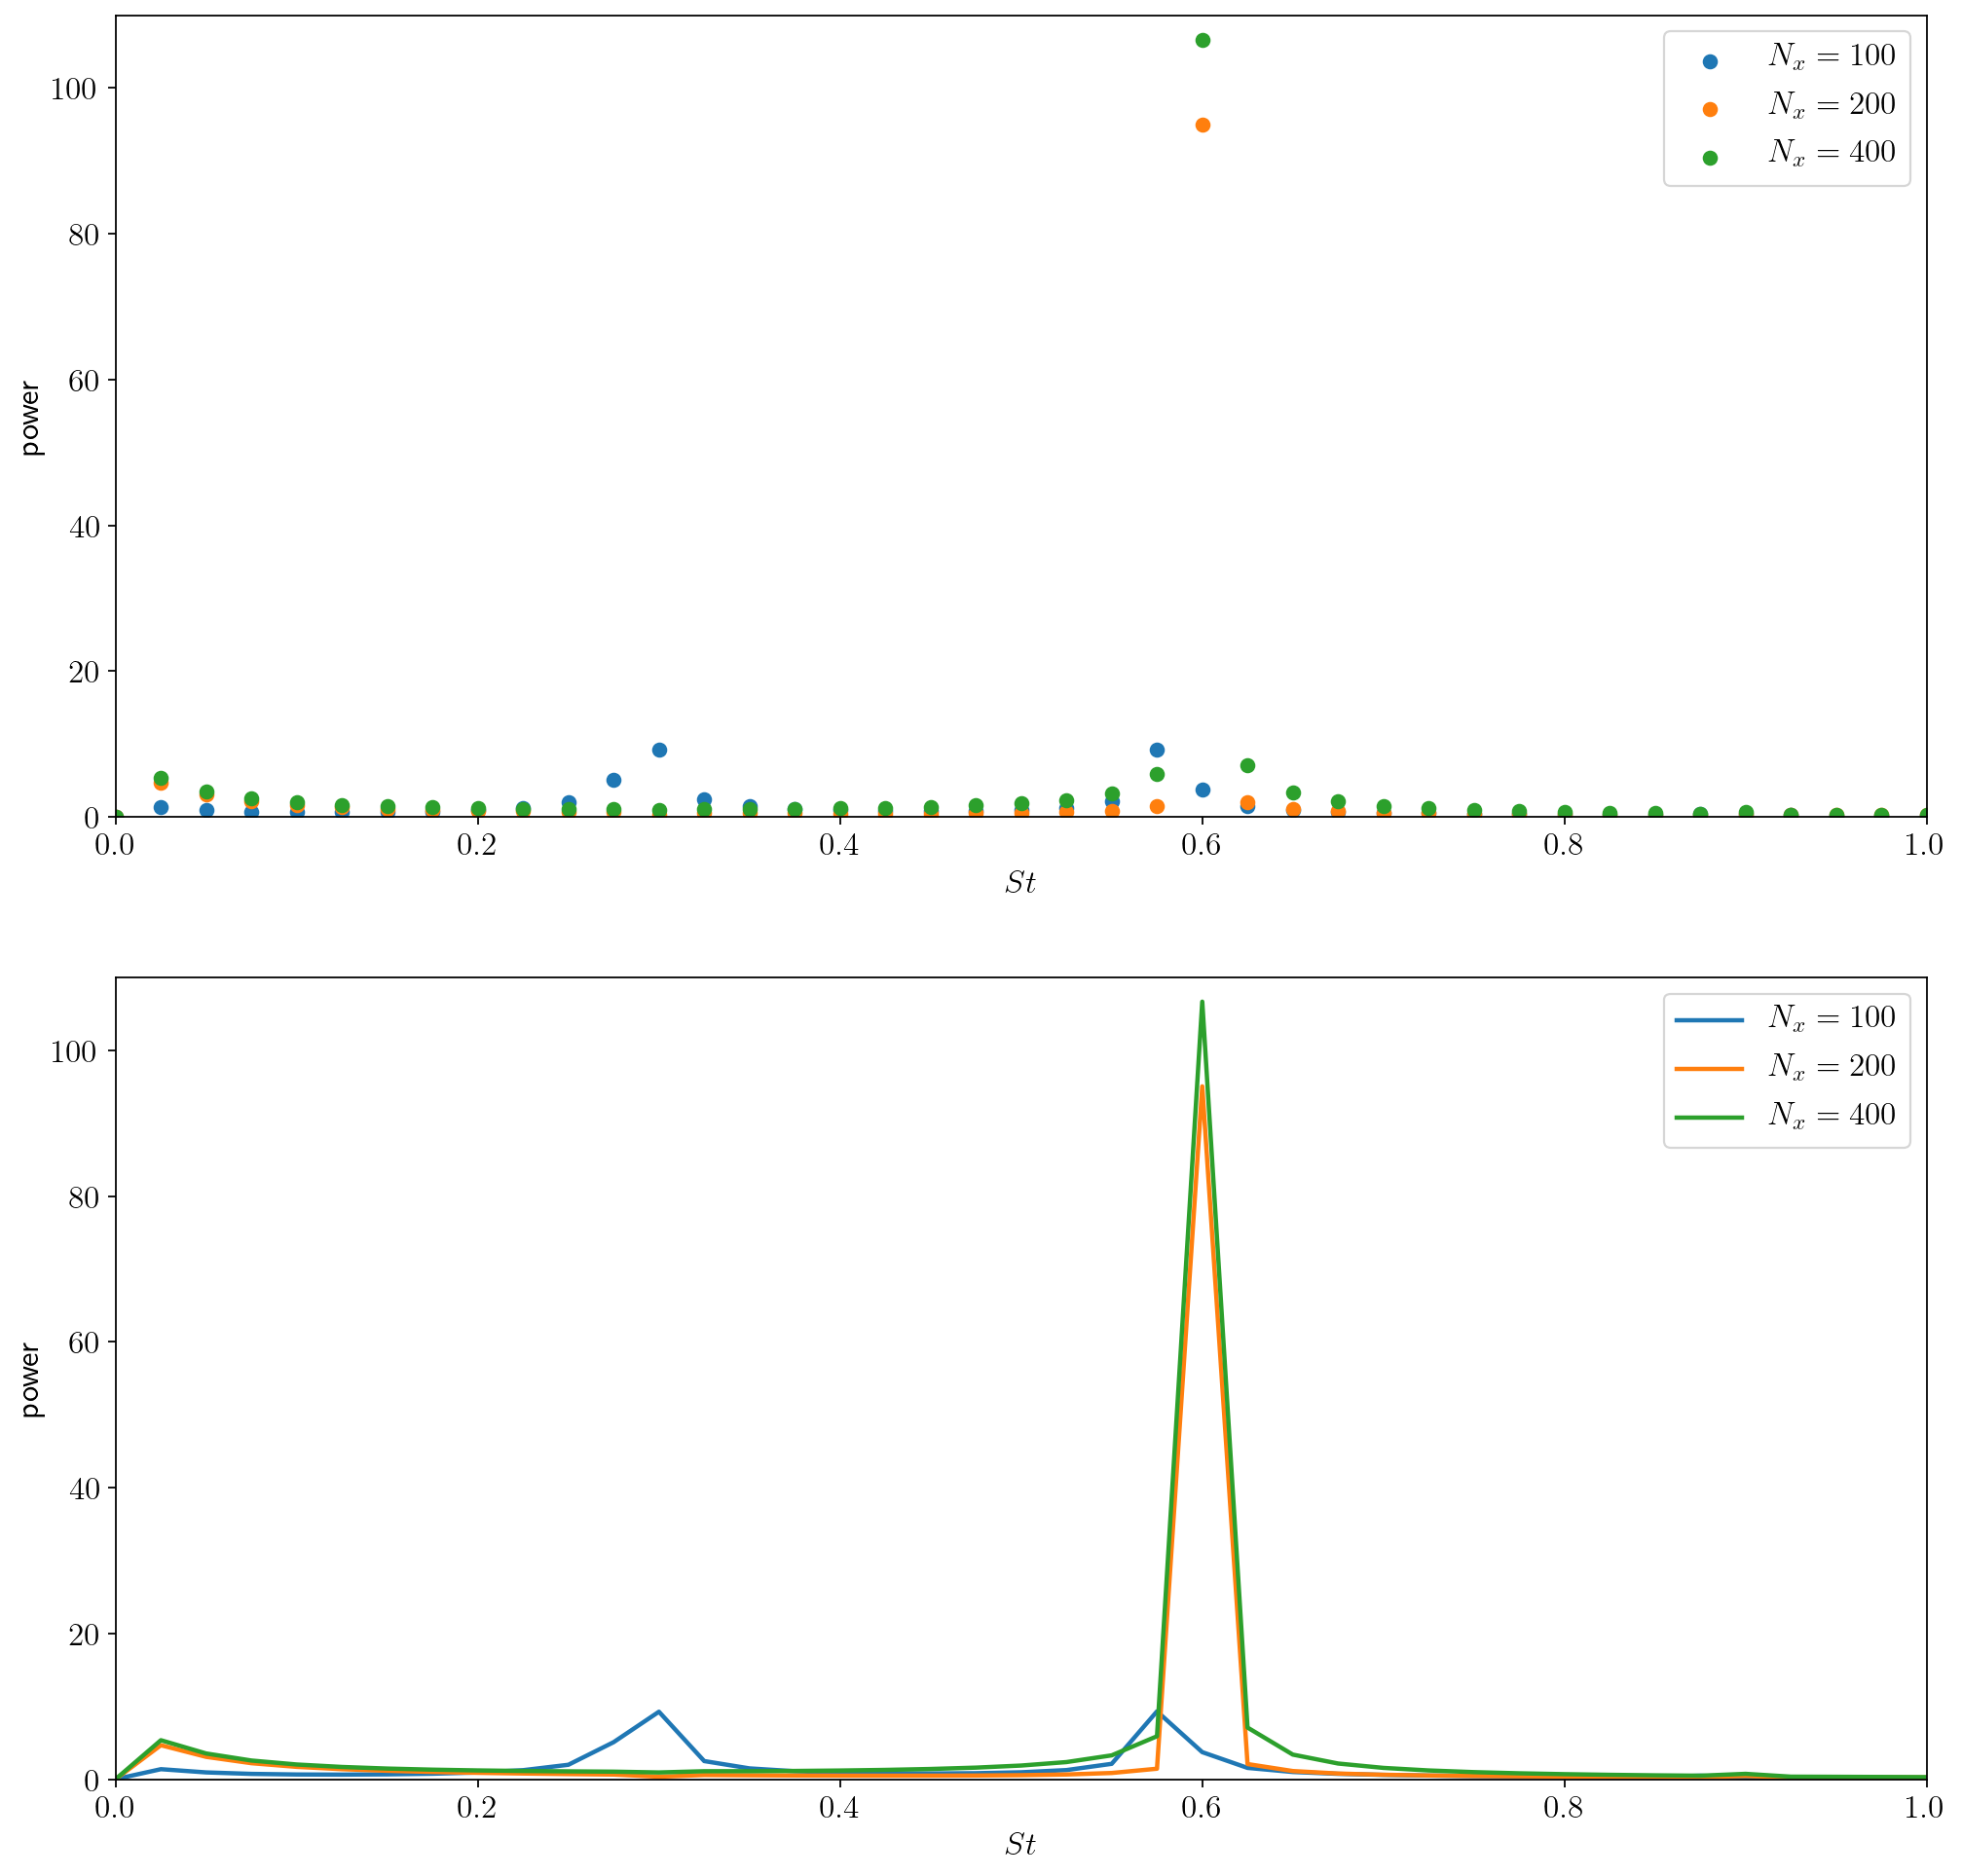

In [3]:
cd_zero_mean = {}
cl_zero_mean = {}
fft_cd = {}
fft_cl = {}
n_rm = 8000
diameter = 0.1
labels = [r'$N_x={:d}$'.format(cells) for cells in [100, 200,400]]

fig, (ax, axins) = plt.subplots(nrows=2,figsize=(15,15))
for i, case in enumerate(cases):
    ax.plot(data[case][0],data[case][1], linewidth=2, label=labels[i])
    axins.plot(data[case][0],data[case][1], linewidth=2, label=labels[i])
axins.set_xlim((6,8))
ax.set_ylim((2.92,3.21))
axins.set_ylim((3.02, 3.22))
ax.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
axins.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, linewidth=2.5, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="crimson") 

ax.set_ylabel('Cd')
ax.set_xlabel('Time[s]')
axins.set_ylabel('Cd')
axins.set_xlabel('Time[s]')


for i, case in enumerate(cases):
    cd_zero_mean[case] = data[case][1][n_rm:] - data[case][1][n_rm:].mean()
    cl_zero_mean[case] = data[case][2][n_rm:] - data[case][2][n_rm:].mean()
    print("mean drag/lift for {:s}: {:2.4f}/{:2.4f}".format(case, np.round(data[case][1][n_rm:].mean(), 4), np.round(data[case][2][n_rm:].mean(), 4)))

for i, case in enumerate(cases):
    time_step = (8.0 - 4.0) / data[case][0][n_rm:].shape[0]
    # drag
    cd_fft = fftpack.fft(cd_zero_mean[case])
    sample_freq = fftpack.fftfreq(cd_fft.size, d=time_step)
    fft_cd[case] = (sample_freq, np.abs(cd_fft))
    # lift
    cl_fft = fftpack.fft(cl_zero_mean[case])
    fft_cl[case] = (sample_freq, np.abs(cl_fft))


fig, (ax,ax1) = plt.subplots(2, 1, figsize=(15, 15))
for i, case in enumerate(cases):
    freq, power = fft_cd[case]
    ax.scatter(freq[:100] * diameter, power[:100], label=labels[i])
    ax1.plot(freq[:100] * diameter, power[:100], label=labels[i], linewidth=2)
    print("Frequency peak at f={:2.2f}".format(freq[np.argmax(power)]))
ax.set_xlabel("$St$")
ax.set_ylabel("power")
ax.set_xlim(0, 1)
ax.set_ylim(0, 110)
ax.legend() 
ax1.set_xlabel("$St$")
ax1.set_ylabel("power")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 110)
ax1.legend()

#### Ploting values of Cd and Cl after 3s 
File will be saved in /plots dir

Frequency peak at f=3.00
Frequency peak at f=3.00
Frequency peak at f=3.00


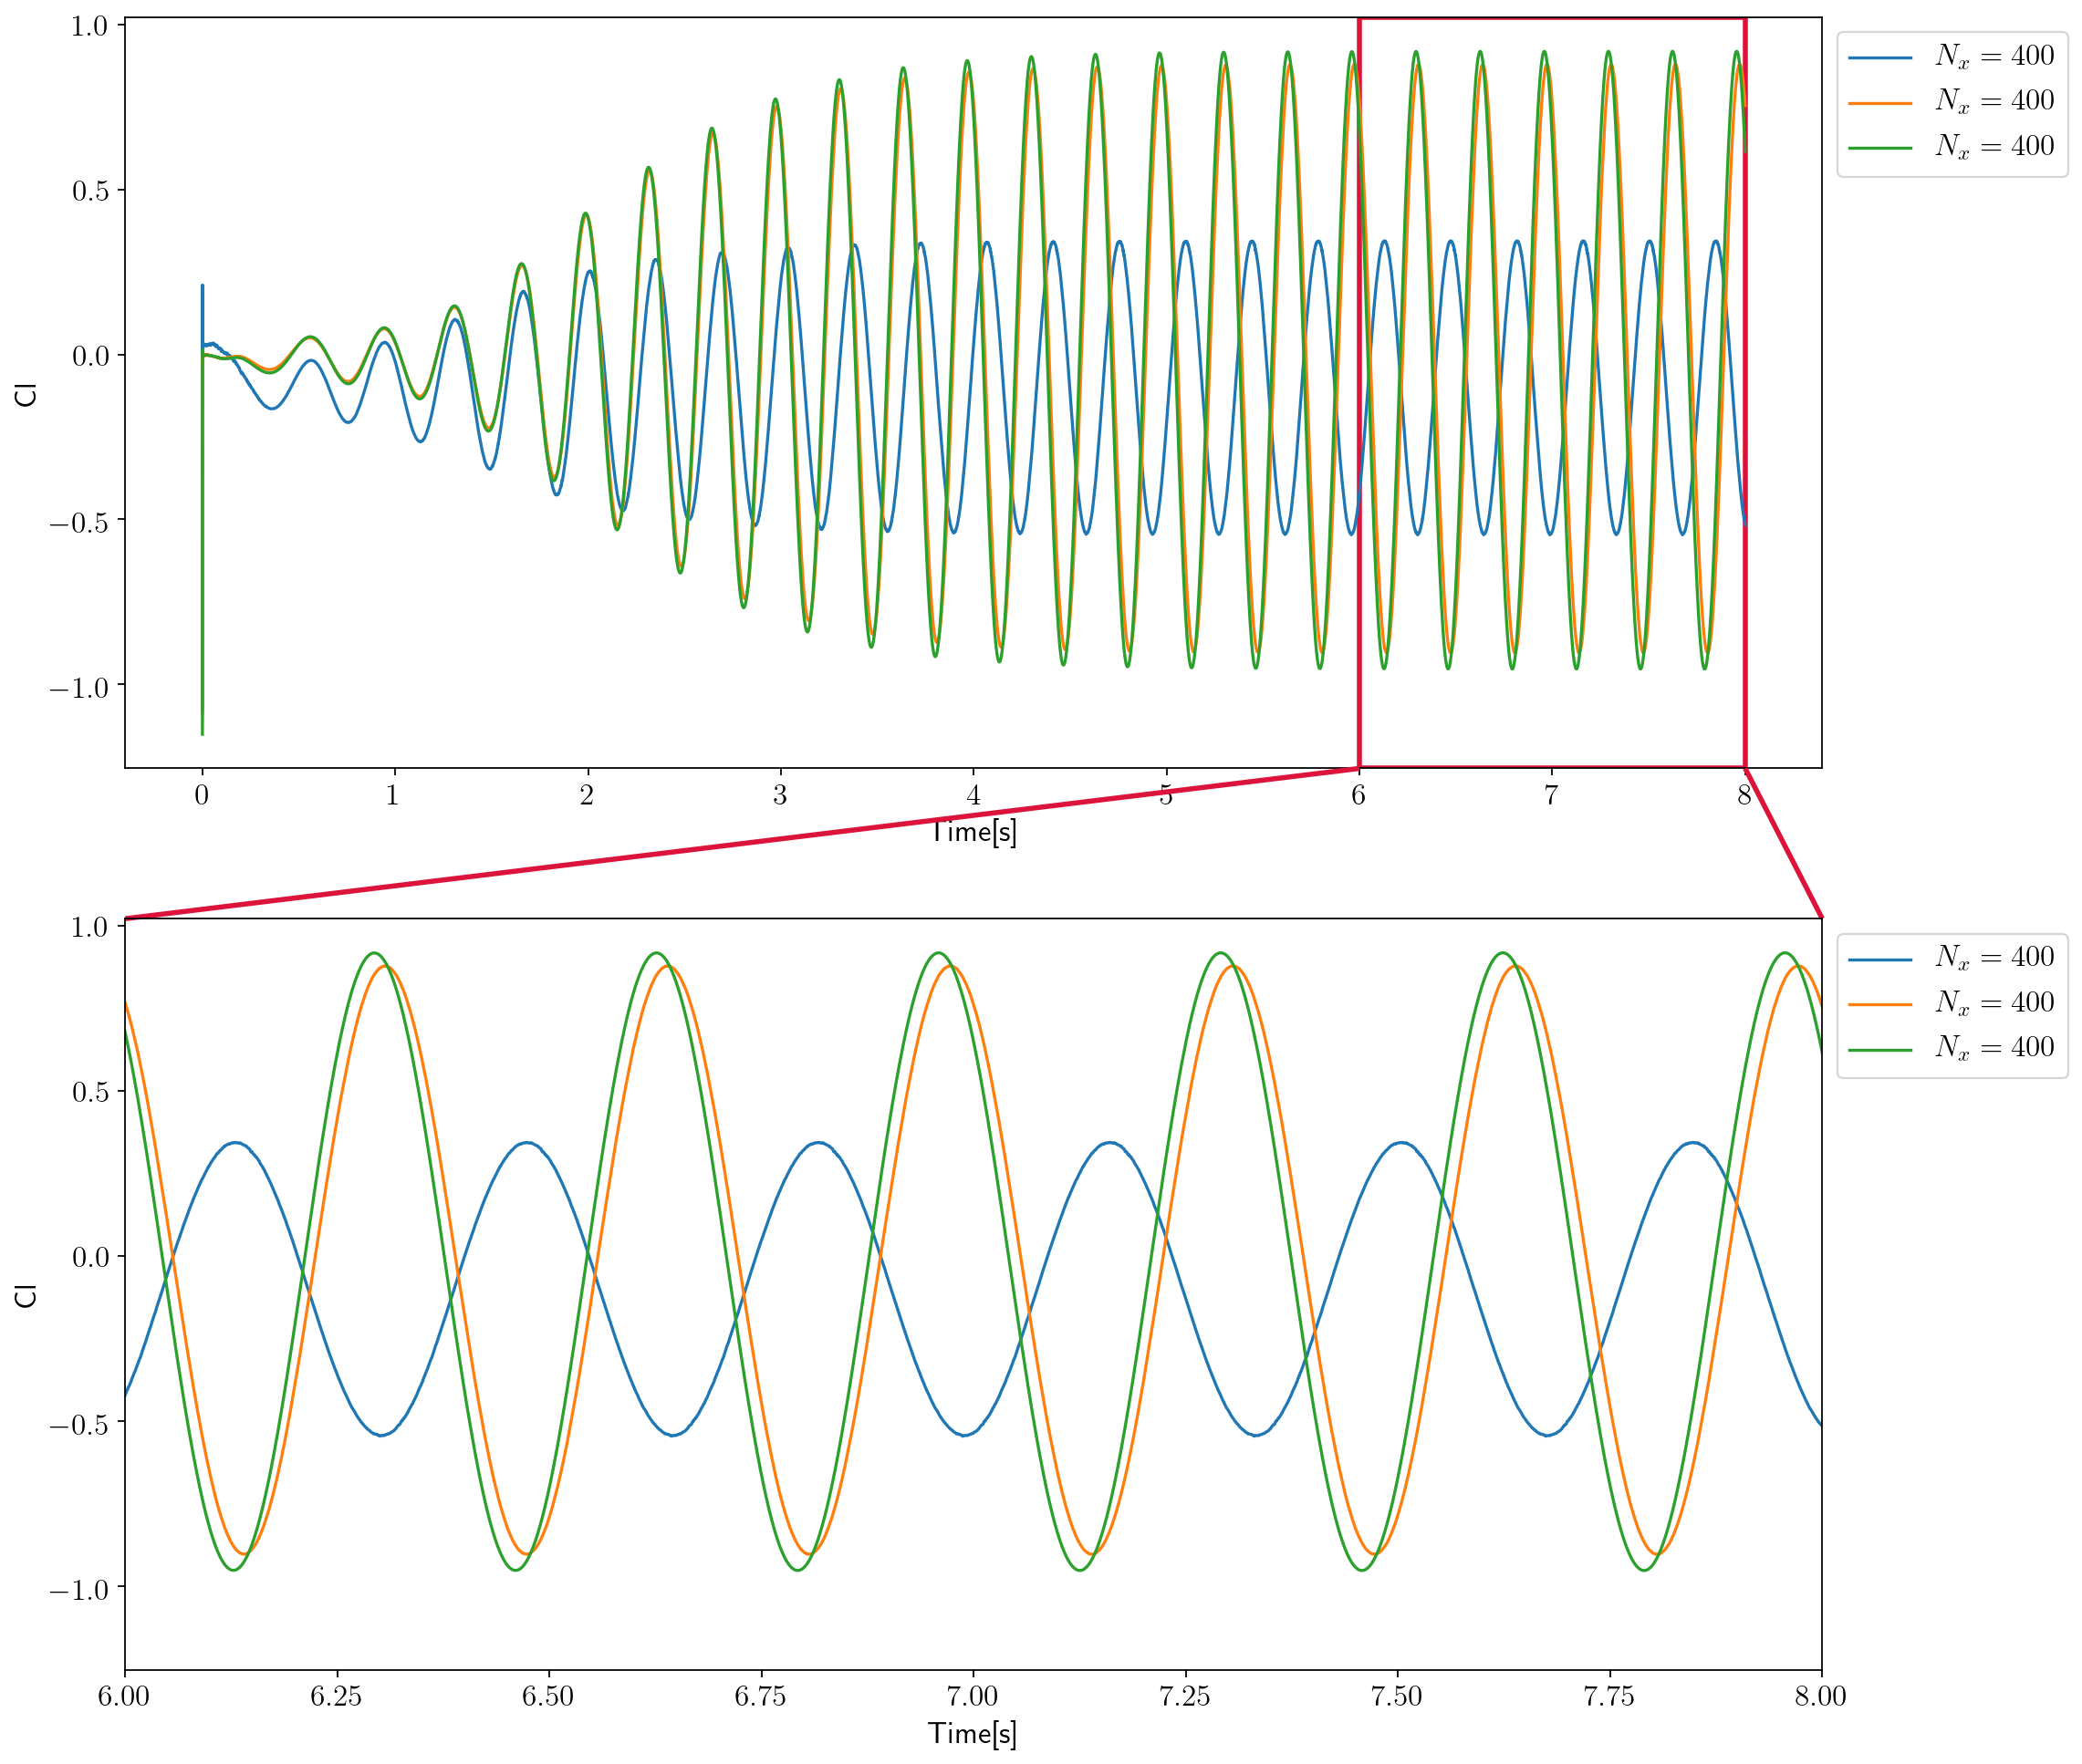

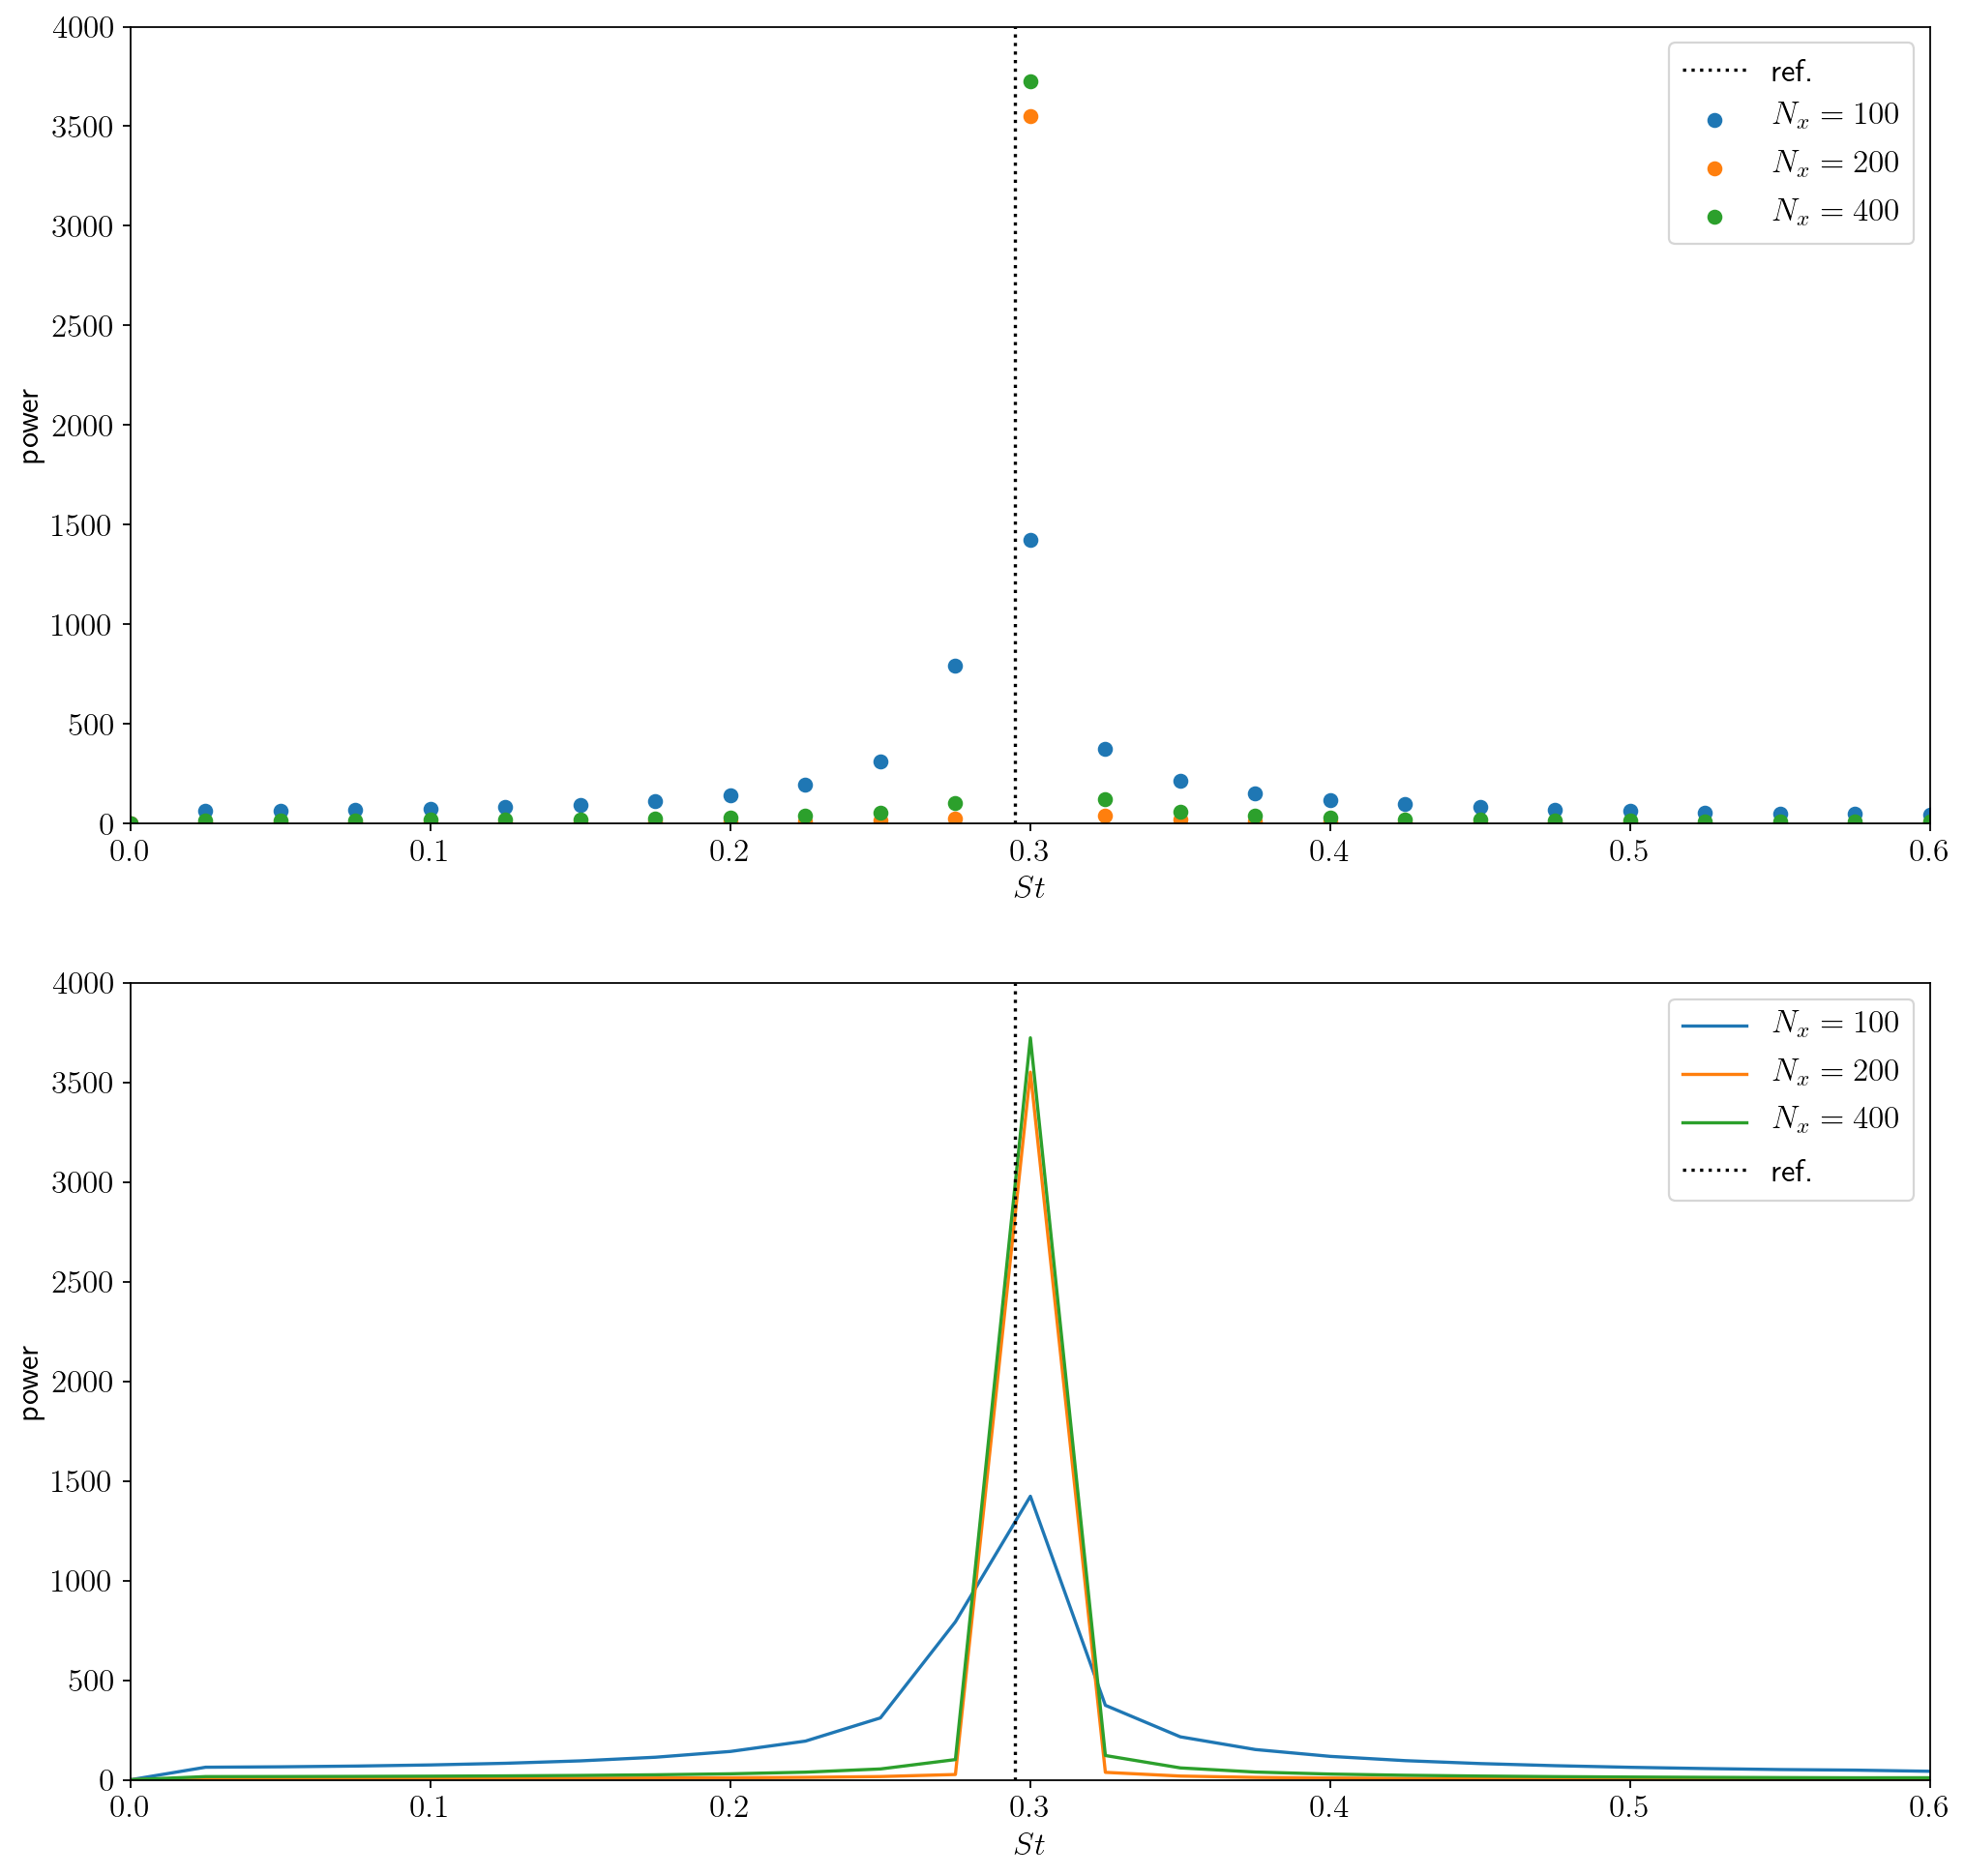

In [4]:
fig, (ax, axins) = plt.subplots(nrows=2,figsize=(15,15))
for case in cases:
    ax.plot(data[case][0],data[case][2], label=labels[i])
    axins.plot(data[case][0],data[case][2], label=labels[i])
plt.rcParams.update({'font.size': 15})
axins.set_xlim((6,8))
ax.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
axins.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, linewidth=2.5, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="crimson") 
plt.rcParams.update({'font.size': 15})
ax.set_ylabel('Cl')
ax.set_xlabel('Time[s]')
axins.set_ylabel('Cl')
axins.set_xlabel('Time[s]')

#frequancy analysis
fig, (ax,ax1) = plt.subplots(2, 1, figsize=(15, 15))
for i, case in enumerate(cases):
    freq, power = fft_cl[case]
    ax.scatter(freq[:100] * diameter, power[:100], label=labels[i])
    ax1.plot(freq[:100] * diameter, power[:100], label=labels[i])
    print("Frequency peak at f={:2.2f}".format(freq[np.argmax(power)]))
ax.axvline(0.295, ls=":", color="k", label="ref.")
ax.set_xlabel("$St$")
ax.set_ylabel("power")
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 4000)
ax.legend()
ax1.axvline(0.295, ls=":", color="k", label="ref.")
ax1.set_xlabel("$St$")
ax1.set_ylabel("power")
ax1.set_xlim(0, 0.6)
ax1.set_ylim(0, 4000)
ax1.legend()

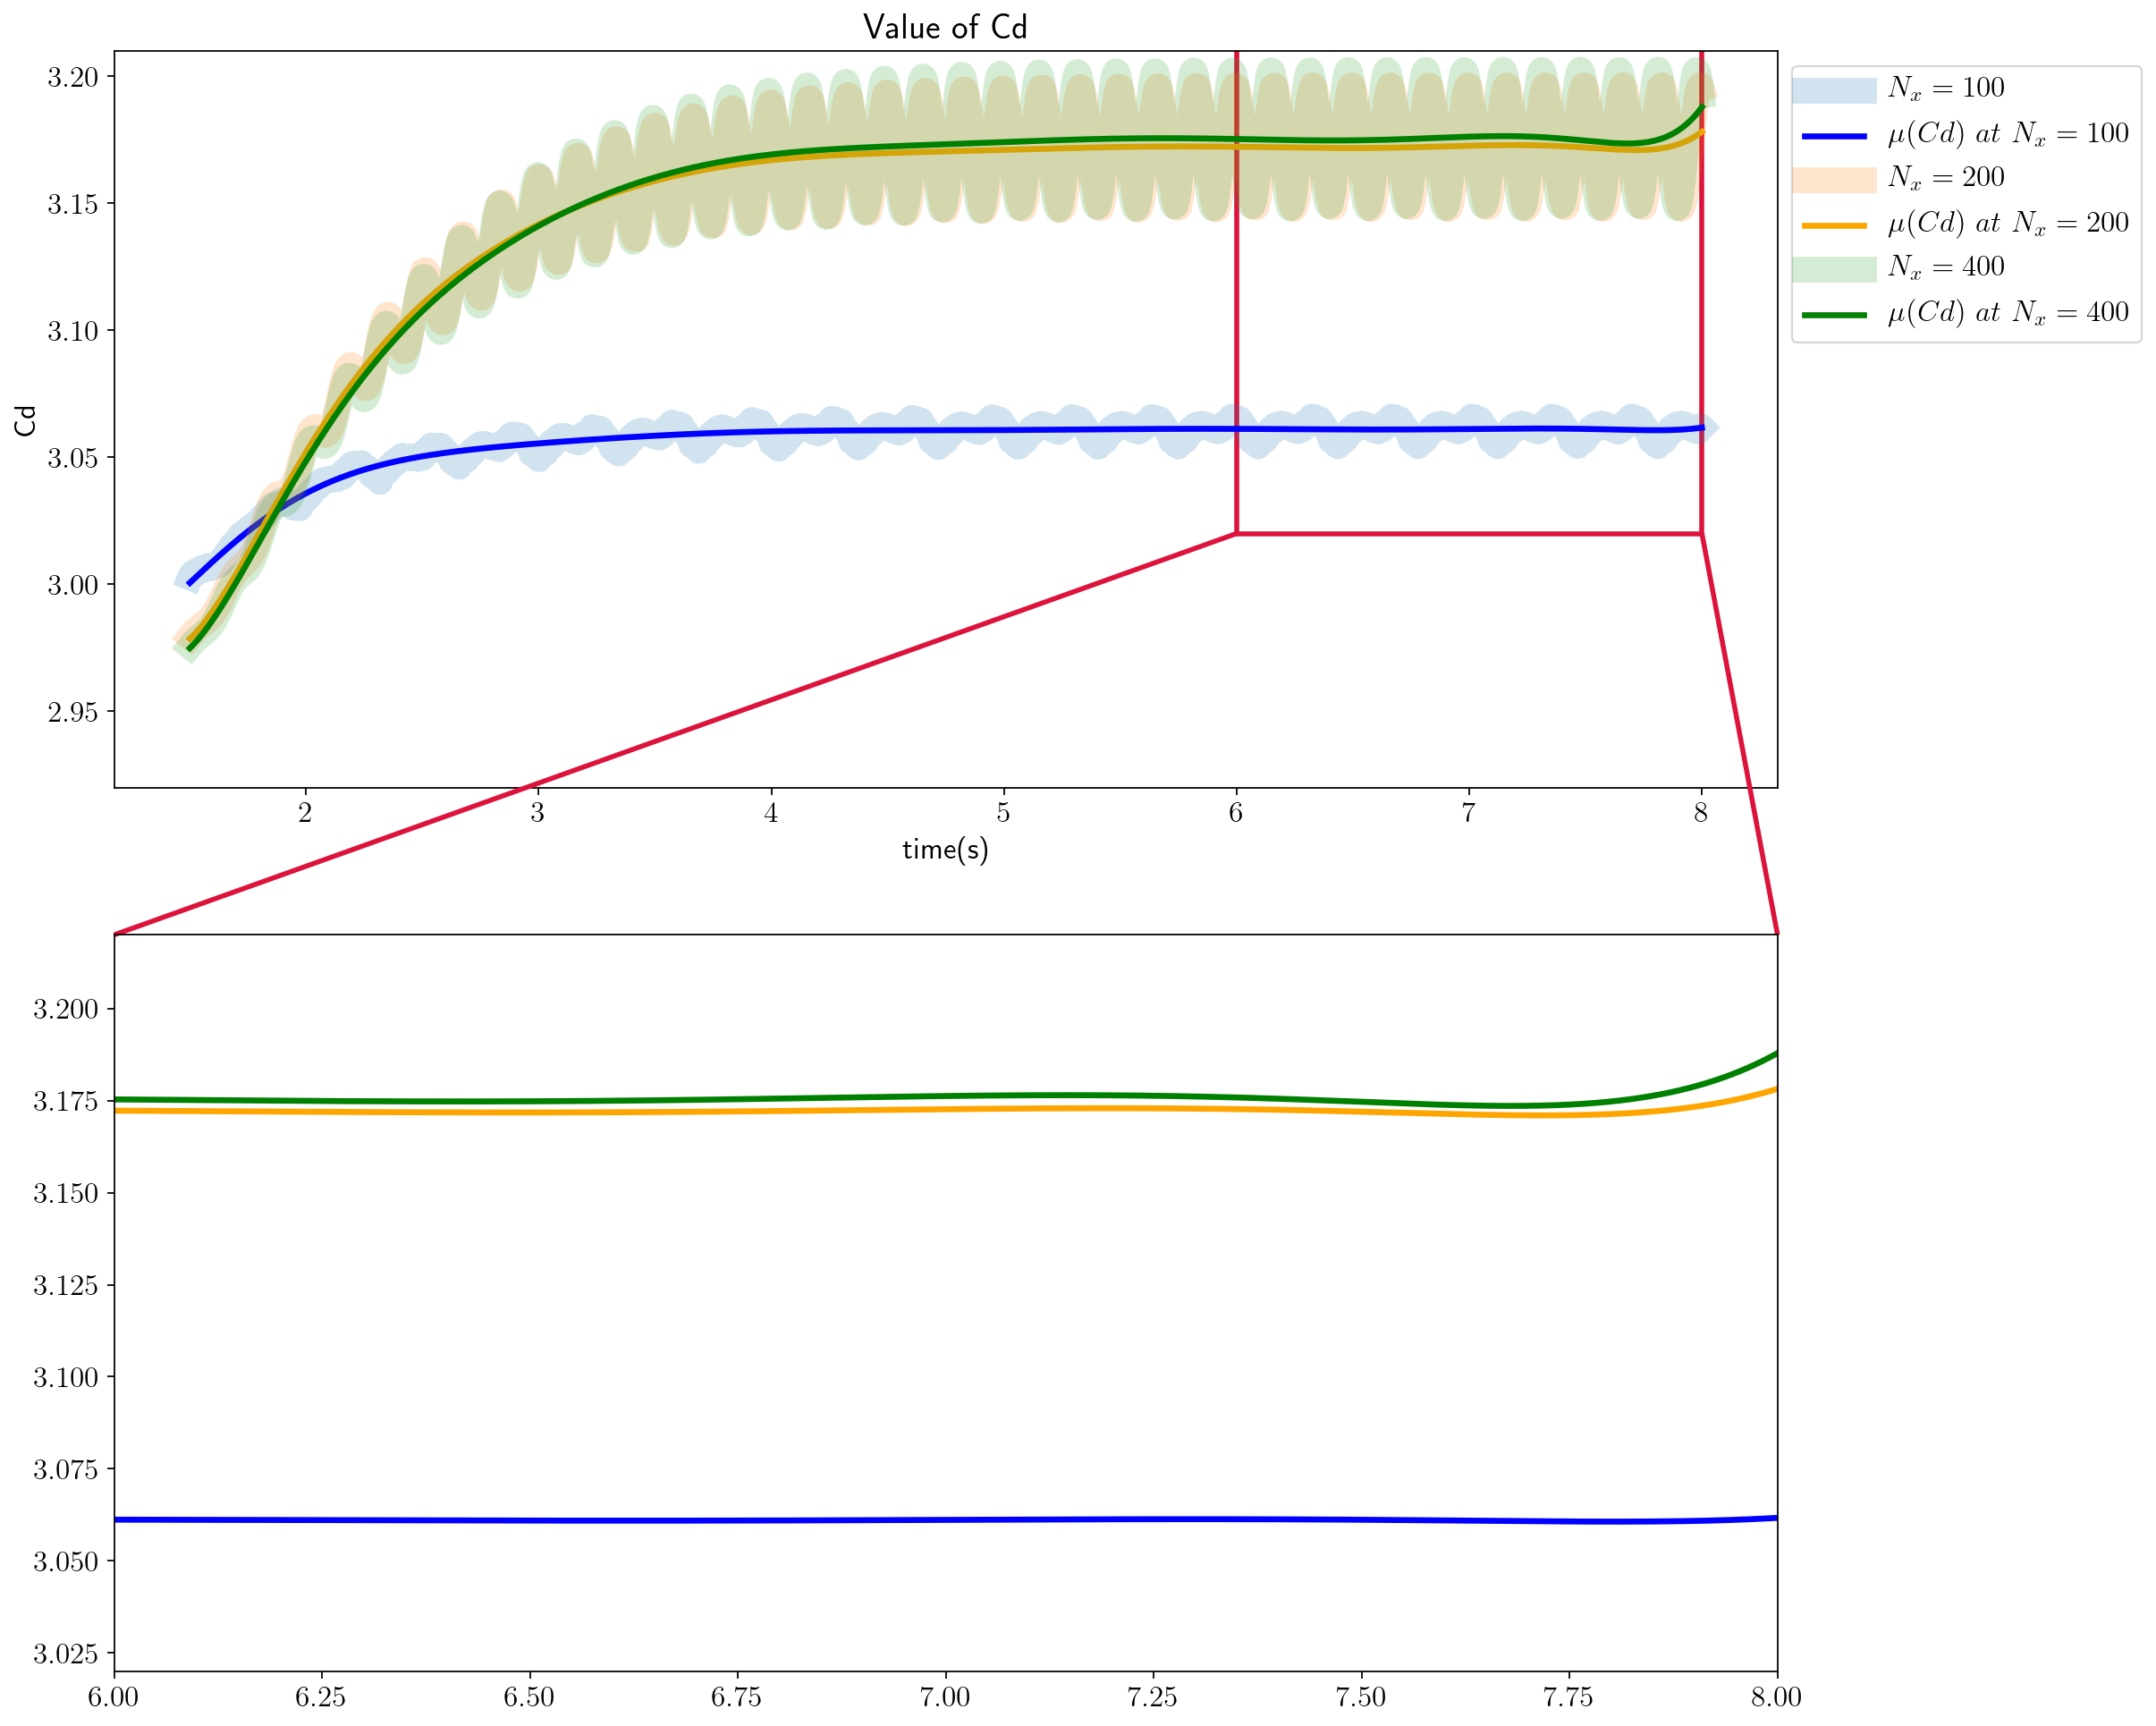

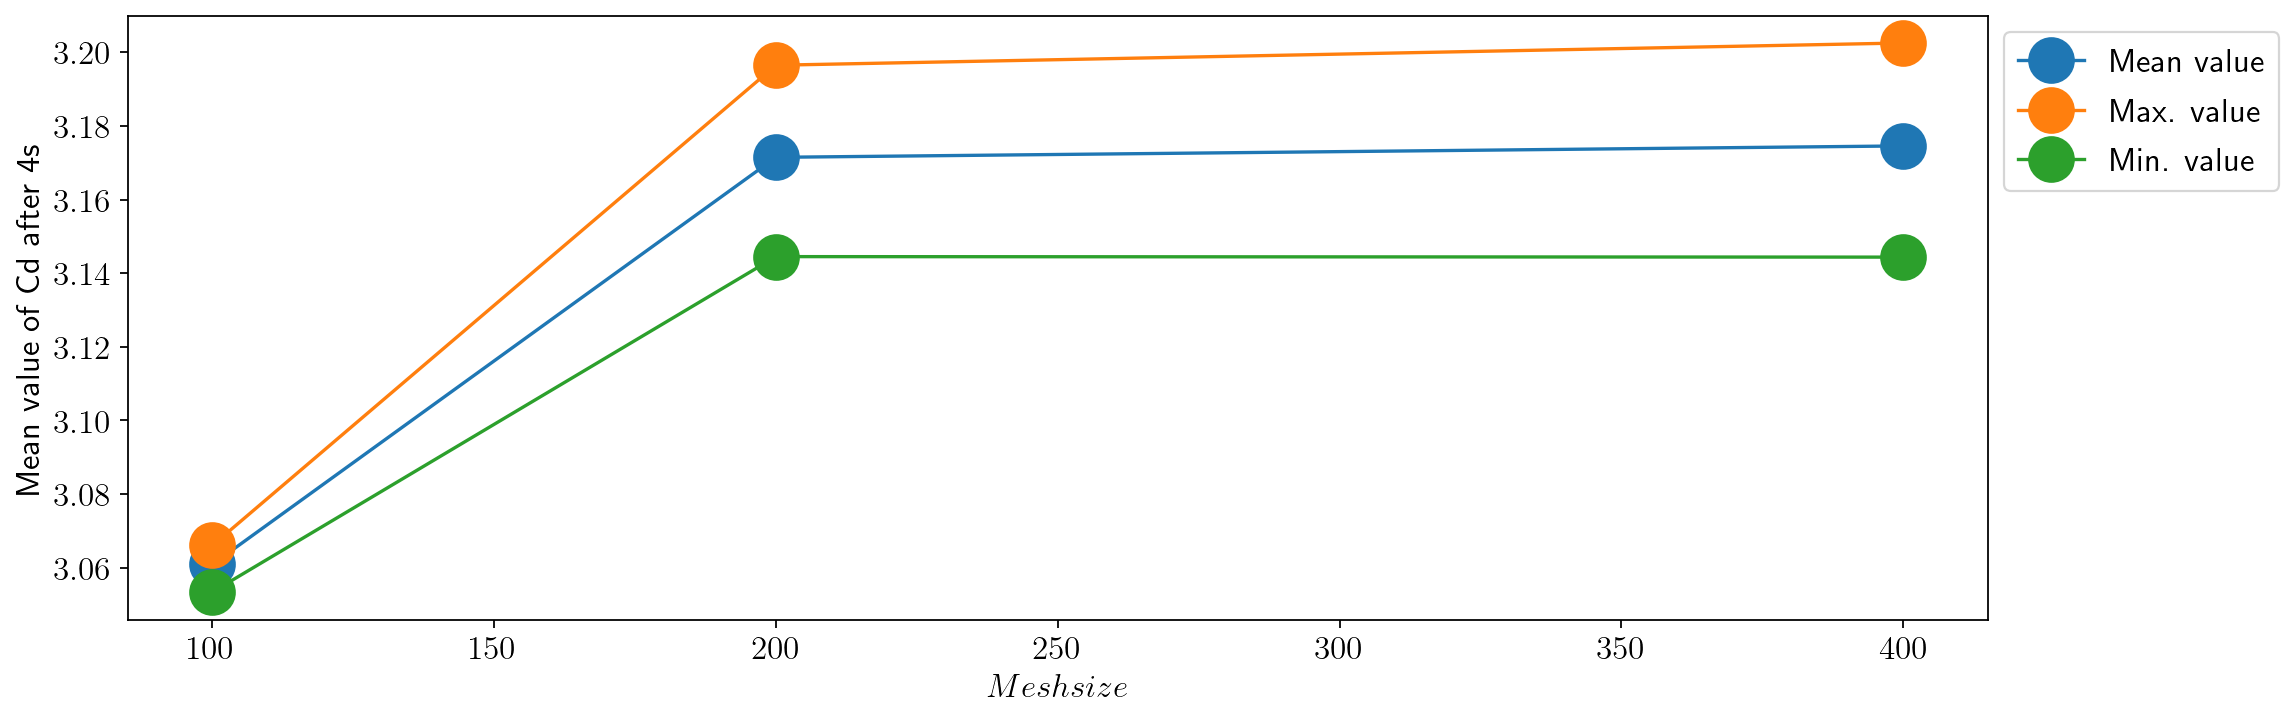

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
color = ["blue", "orange", "green"]
mean_labels = [r"$\mu(Cd) \ at \ N_x={:d}$".format(cells) for cells in [100, 200,400]]
for i, case in enumerate(cases):
    r_data = np.array([data[case][0],data[case][1]])
    r_data = r_data[:, 3000:]
    z1 = np.polyfit(r_data[0],r_data[1], 10)
    p1 = np.poly1d(z1)
    ax1.plot(r_data[0], r_data[1], '-', alpha=0.2, linewidth=13, label=labels[i])
    ax1.plot(r_data[0],p1(r_data[0]),'-', linewidth=3, label=mean_labels[i], color=color[i])
    ax2.plot(r_data[0],p1(r_data[0]),'-', linewidth=3, color=color[i], label=mean_labels[i])
    ax1.set_xlabel('time(s)')
    ax1.set_ylabel('Cd')
    ax1.title.set_text('Value of Cd')
ax2.set_xlim((6,8))
ax1.set_ylim((2.92,3.21))
ax2.set_ylim((3.02, 3.22))
ax1.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, linewidth=2.5, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="crimson") 
ax.set_ylabel('Cd')
ax.set_xlabel('Time[s]')
axins.set_ylabel('Cd')
axins.set_xlabel('Time[s]')

mesh_size = np.array([100, 200, 400])
mean_cd = np.zeros(mesh_size.shape)
max_cd = np.zeros(mesh_size.shape)
min_cd = np.zeros(mesh_size.shape)
fig, ax = plt.subplots(1,1,figsize=(15,5))

for i, case in enumerate(cases):
    mean_cd[i] = data[case][1][n_rm:].mean()
    max_cd[i]  = data[case][1][n_rm:].max()
    min_cd[i]  = data[case][1][n_rm:].min()
ax.plot(mesh_size, mean_cd, '-o', markersize=20, label="Mean value")
ax.plot(mesh_size, max_cd, '-o', markersize=20, label="Max. value")
ax.plot(mesh_size, min_cd, '-o', markersize=20, label="Min. value")
ax.set_xlabel("$Mesh size$")
ax.set_ylabel("Mean value of Cd after 4s")
ax.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')

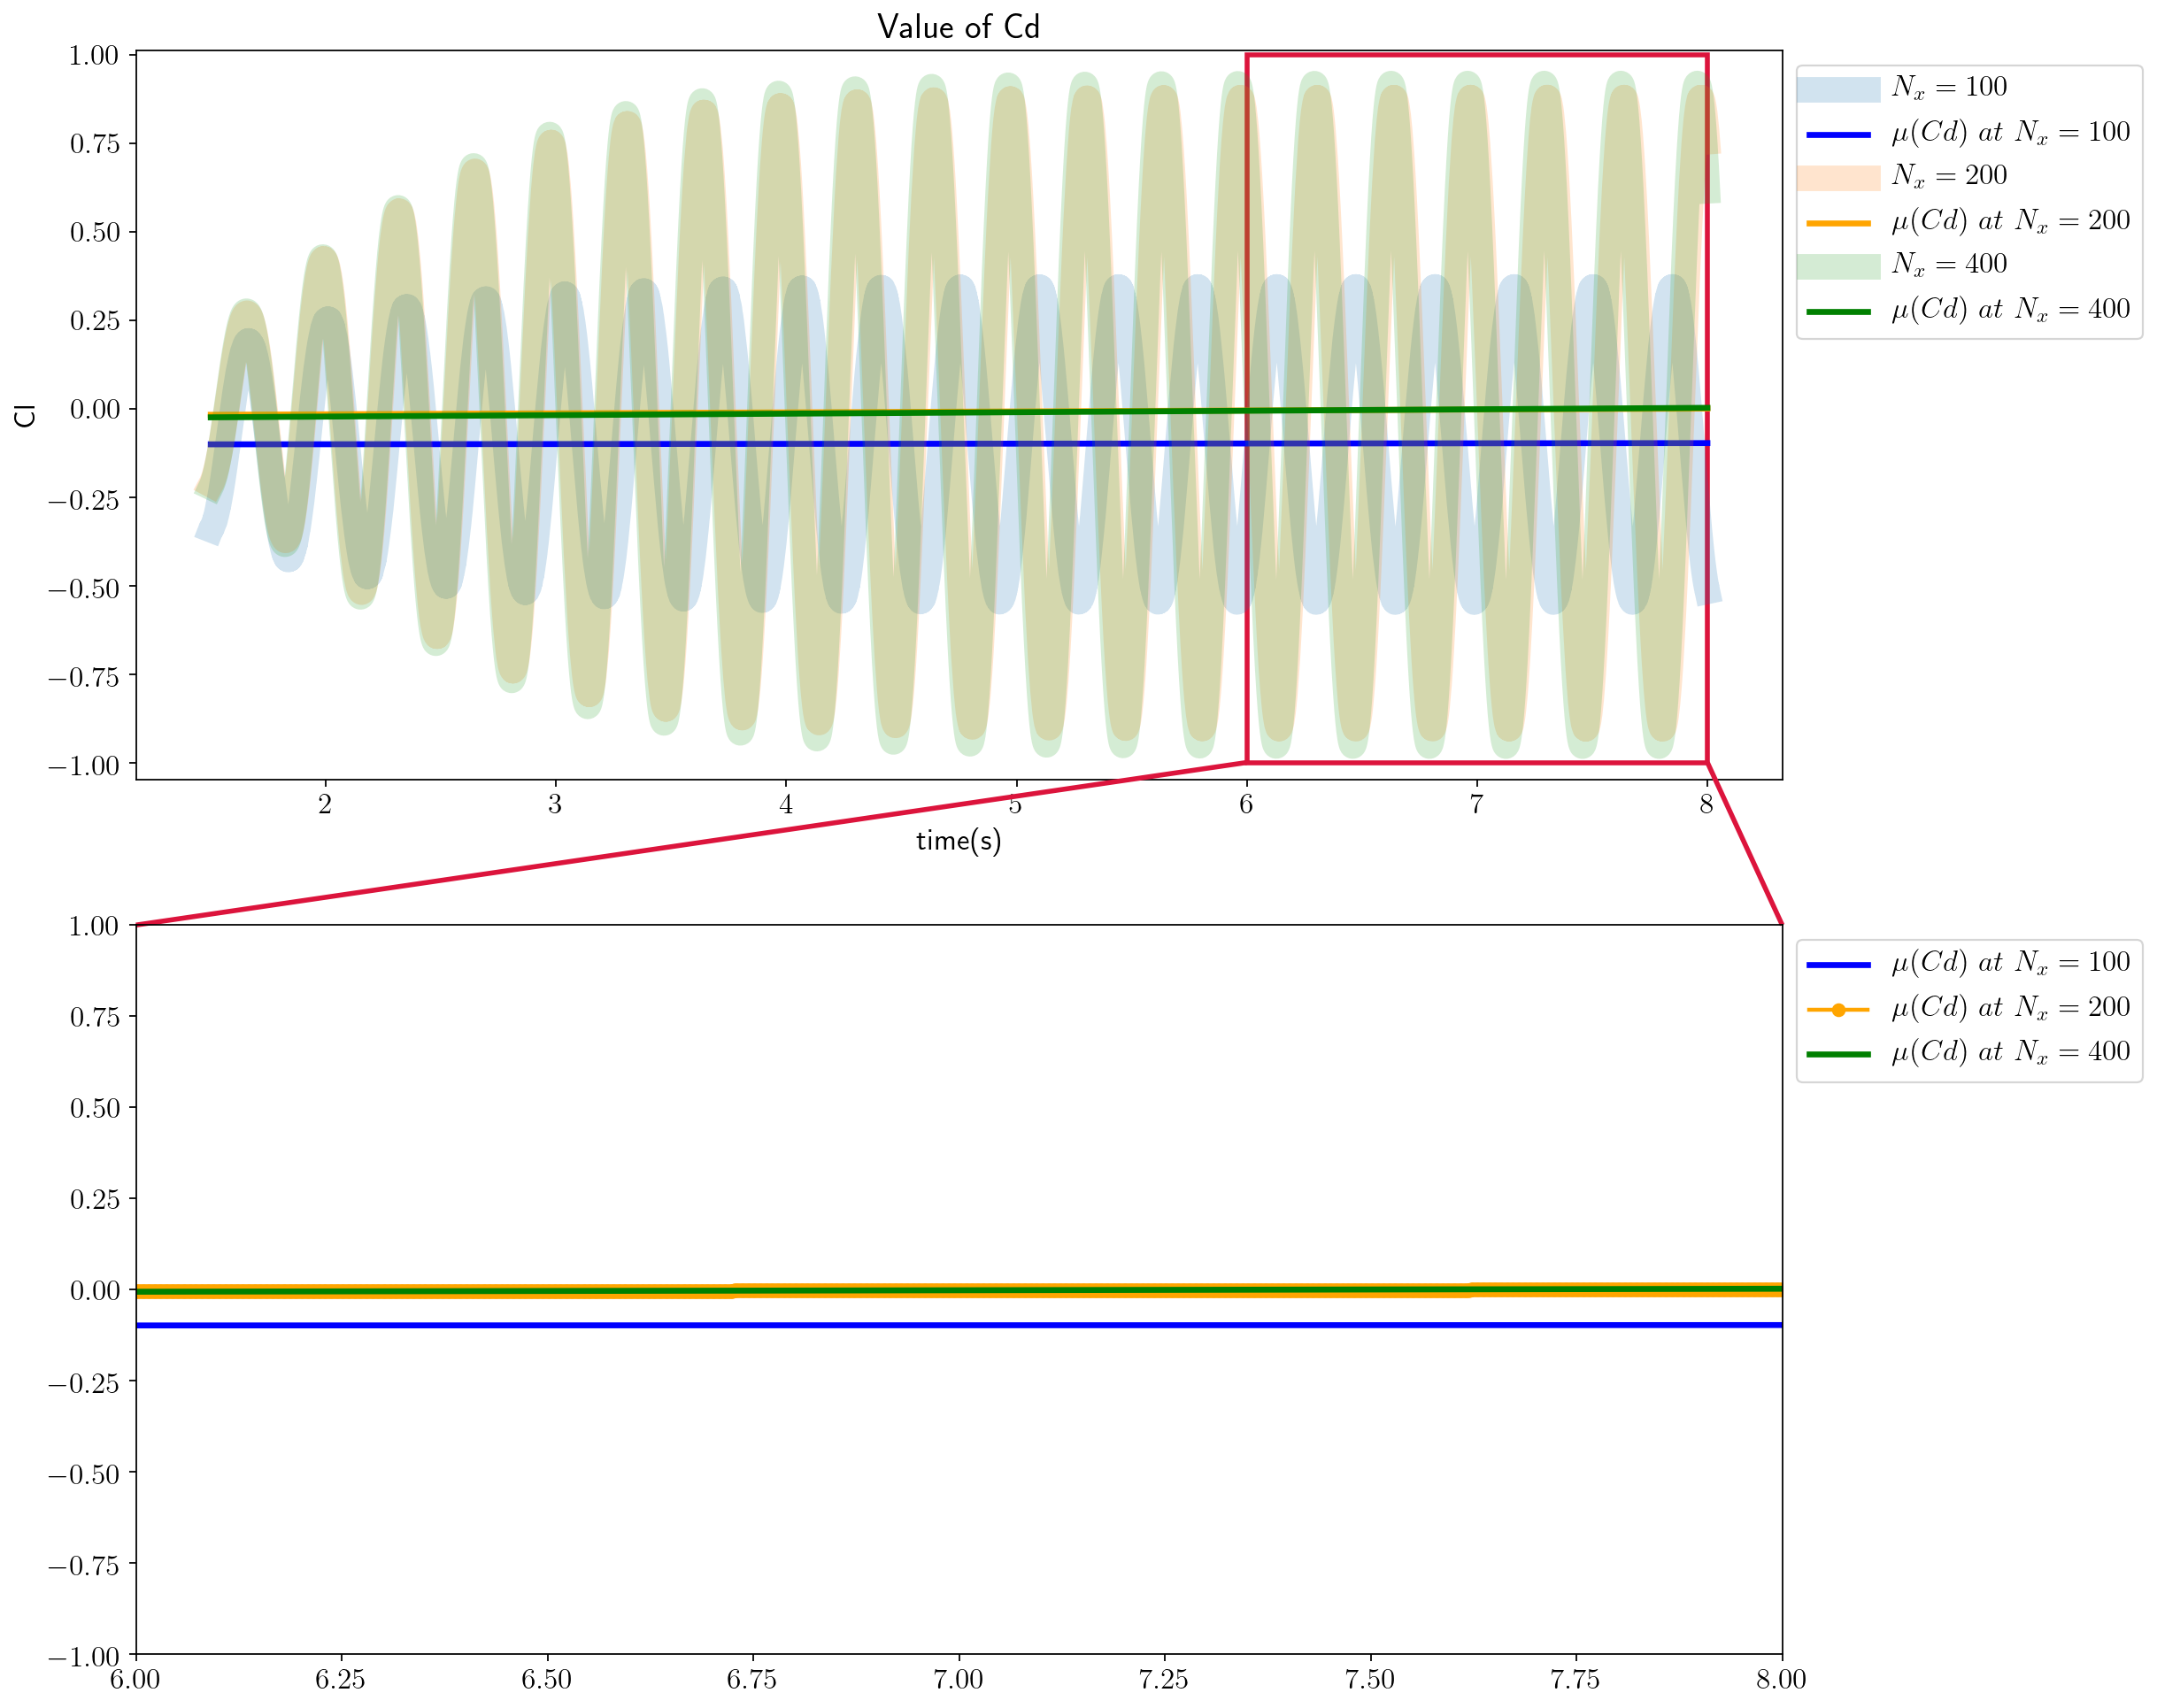

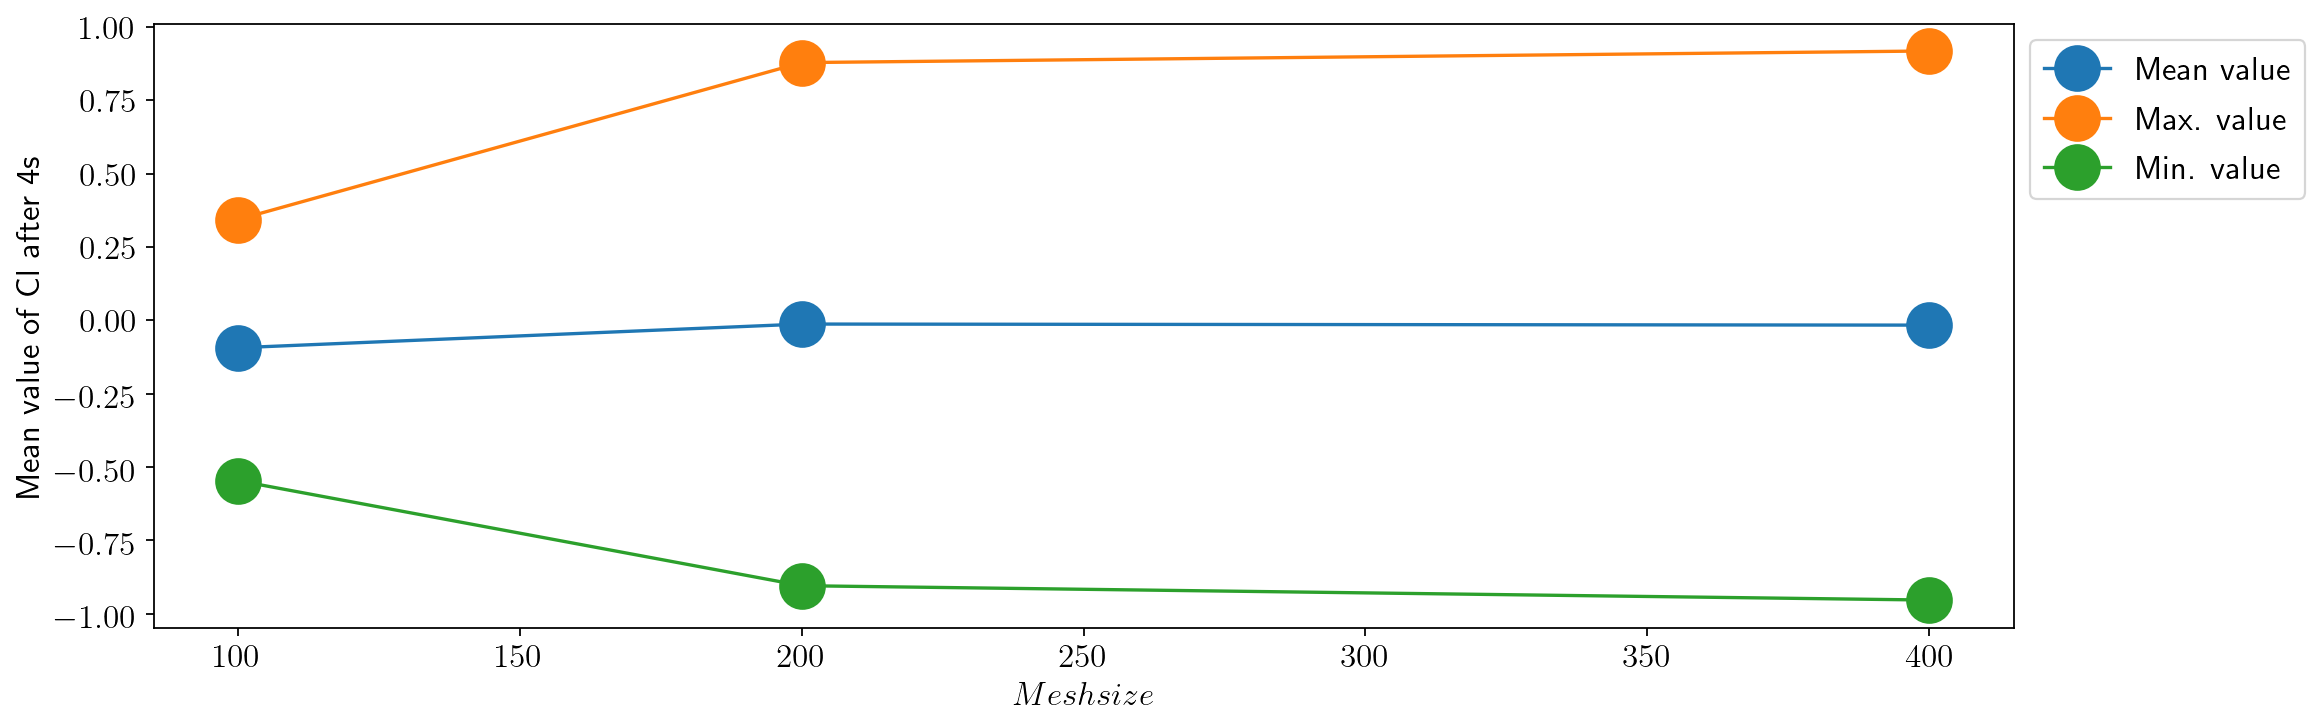

In [9]:
plot, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
for i, case in enumerate(cases):
    r_data = np.array([data[case][0],data[case][2]])
    r_data = r_data[:, 3000:]
    z1 = np.polyfit(r_data[0],r_data[1], 1)
    p1 = np.poly1d(z1)
    ax1.plot(r_data[0], r_data[1], '-', alpha=0.2, linewidth=13, label=labels[i])
    ax1.plot(r_data[0],p1(r_data[0]),'-', linewidth=3, label=mean_labels[i], color=color[i])
    if i == 1:
        ax2.plot(r_data[0],p1(r_data[0]),'-o', linewidth=2, color=color[i],label=mean_labels[i])
    else:
        ax2.plot(r_data[0],p1(r_data[0]),'-', linewidth=3, color=color[i],label=mean_labels[i])
    ax1.set_xlabel('time(s)')
    ax1.set_ylabel('Cl')
    ax1.title.set_text('Value of Cd')
ax2.set_xlim((6,8))
ax2.set_ylim((-1, 1))
ax1.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
ax2.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, linewidth=2.5, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, linewidth=2.5, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="crimson")
ax.set_ylabel('Cl')
ax.set_xlabel('Time[s]')
axins.set_ylabel('Cl')
axins.set_xlabel('Time[s]')

mean_cl = np.zeros(mesh_size.shape)
max_cl = np.zeros(mesh_size.shape)
min_cl = np.zeros(mesh_size.shape)
plot, ax = plt.subplots(1,1,figsize=(15,5))

for i, case in enumerate(cases):
    mean_cl[i] = data[case][2][n_rm:].mean()
    max_cl[i]  = data[case][2][n_rm:].max()
    min_cl[i]  = data[case][2][n_rm:].min()
ax.plot(mesh_size, mean_cl, '-o', markersize=20, label="Mean value")
ax.plot(mesh_size, max_cl, '-o', markersize=20, label="Max. value")
ax.plot(mesh_size, min_cl, '-o', markersize=20, label="Min. value")
ax.set_xlabel("$Mesh size$")
ax.set_ylabel("Mean value of Cl after 4s")
ax.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')